<a href="https://colab.research.google.com/github/krsna540/Hackthons/blob/master/Cartooons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from skimage import io
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set(style='darkgrid')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
path='/content/drive/My Drive/Colab Notebooks/Emotion_Dataset'

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


In [3]:
traindf=pd.read_csv(path+"/Train.csv")
traindf.shape

(298, 2)

In [4]:
#To CHeck 
traindf.isnull().sum().sum()

0

In [5]:
traindf.head()

,Frame_ID,Emotion
0,frame0.jpg,happy
1,frame1.jpg,happy
2,frame2.jpg,surprised
3,frame3.jpg,surprised
4,frame4.jpg,angry


In [13]:
traindf.Emotion[2]

'surprised'

In [0]:
emotion_cat=traindf.Emotion.unique()

In [7]:
emotion_cat

array(['happy', 'surprised', 'angry', 'Unknown', 'sad'], dtype=object)

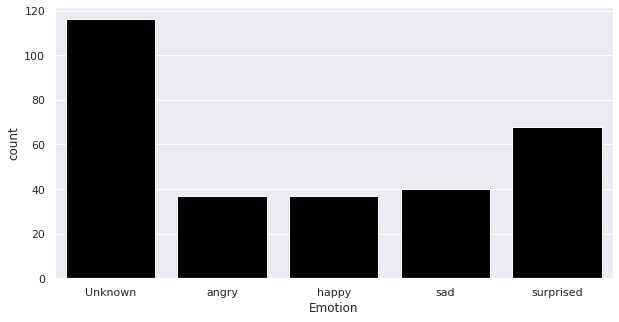

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x='Emotion', data=traindf,
                   order=list(traindf['Emotion'].value_counts().sort_index().index) ,
                   color='black')

In [9]:
for foldername in emotion_cat:
  newpath = path+"/"+str(foldername)
  try:
    os.mkdir(newpath)
  except OSError:
    print ("Creation of the directory %s failed" % newpath)
  else:
    print ("Successfully created the directory %s " % newpath)

Successfully created the directory /content/drive/My Drive/Colab Notebooks/Emotion_Dataset/happy 
Successfully created the directory /content/drive/My Drive/Colab Notebooks/Emotion_Dataset/surprised 
Successfully created the directory /content/drive/My Drive/Colab Notebooks/Emotion_Dataset/angry 
Successfully created the directory /content/drive/My Drive/Colab Notebooks/Emotion_Dataset/Unknown 
Successfully created the directory /content/drive/My Drive/Colab Notebooks/Emotion_Dataset/sad 


In [0]:
def get_CategoryFolderName(count,path):
  foldername=traindf.Emotion[count]
  return path+"/"+str(foldername)

In [15]:
import cv2
vidcap = cv2.VideoCapture(path+'/Train Tom and jerry.mp4')
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
      folderpath=get_CategoryFolderName(count,path)
      imagename="frame"+str(count)+".jpg"
      cv2.imwrite(os.path.join(folderpath , imagename), image)
      #cv2.imwrite("frame"+str(count)+".jpg", image)     # save frame as JPG file
    return hasFrames
sec = 0
frameRate = 1 #//it will capture image in each 5 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

KeyError: ignored